<a href="https://colab.research.google.com/github/ChristianIES/Redes_Neuronales/blob/main/RN_2022_DL_Tarea_1_El_Perceptr%C3%B3n_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 1 - El Perceptrón Multicapa como modelo de regresión

- Nombre: Valentina Bastidas S.
- Programa: Doctorado en Estadística


- Nombre: Christian Araya M.
- Programa: Doctorado en Estadística


- Nombre: 
- Programa: 


En la presente tarea se estudiará las capacidades y dificultades del Perceptrón Multicapa (MLP) como modelo de aprendizaje estadístico.

**Ingresar los Toolbox utilizados en este Notebook**



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr
from scipy.stats import spearmanr

from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense

%matplotlib inline

In [3]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

En esta tarea Ud. deberá construir un modelo de MLP para aproximar una superficie en el espacio $\mathbb{R}^3$

La superficie que se va a aproximar con la red neuronal será la siguiente:

$$z =  3\cdot (1-x)^2\cdot e^{-x^2 - (y+1)^2} - 10\cdot (\frac{1}{5}x - x^3 - y^5)\cdot e^{-x^2-y^2} - \frac{1}{3}\cdot e^{-(x+1)^2 - y^2} $$


1. Generar una función que dado el valor de $x$ e $y$ calcule $z$

In [4]:
def funcion(XX,YY):
  return 3*((1-XX)**2)*np.exp(-XX**2-(XY+1)**2)-10*(XX/5-XX**3-XY**5)*np.exp(-XX**2-XY**2)-(1/3)*np.exp(-(XX+1)**2-XY**2)





2. Realizar el gráfico de la superficie en el rango $[-3,3]\times [-3,3]$. (https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html)

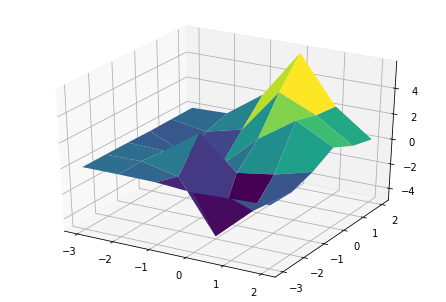

In [5]:
XX = np.arange(-3, 3, 1)
XY = np.arange(-3, 3, 1)
XX, XY = np.meshgrid(XX, XY)
Z = funcion(XX,XY)

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(XX, XY, Z, rstride=1, cstride=1, cmap=cm.viridis)

3. Generar de forma aleatoria 10000 datos $(x,y,z)$ con distribución uniforme en el rango $[-3,3]\times [-3,3]$. Realizar un gráfico de dispersión de los puntos. Considerar este cojunto como conjunto de entrenamiento. Luego, generar de forma aleatoria otros 10000 datos para el conjunto de test.

In [6]:
#Generación de Datos Aleatorios:

x = np.random.uniform(-3,3,10000)
y = np.random.uniform(-3,3,10000)
z=3*((1-x)**2)*np.exp(-x**2-(y+1)**2)-10*(x/5-x**3-y**5)*np.exp(-x**2-y**2)-(1/3)*np.exp(-(x+1)**2-y**2)

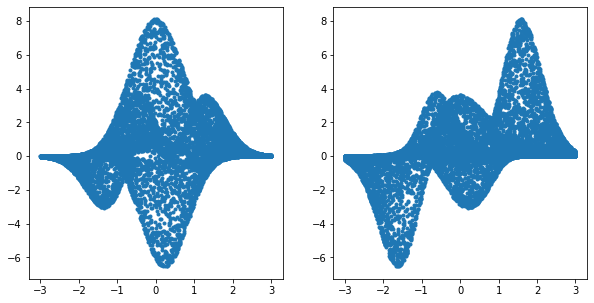

In [7]:
#Gráficos de Dispersión:
fig, dis = plt.subplots(1,2,figsize=(10,5))
dis[0].plot(x, z,'.')
dis[1].plot(y, z,'.')

4. Generar una nueva variable $V$ a la cual se le introduce un ruido gaussiano con desviación estándar de $0.05$, es decir:

$$v = z + \epsilon$$

donde $\epsilon \sim {\cal N}(0, \sigma_{\epsilon}^2)$, $\sigma_{\epsilon}=0.7$

Realizar el grafico de dispersión.

In [8]:
#Generación de ruido gaussiano:
e = np.random.normal(0,0.05,10000)
v=z+e

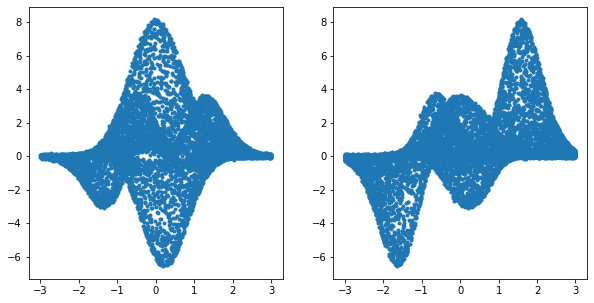

In [9]:
#Gráficos de Dispersión:
fig, dis = plt.subplots(1,2,figsize=(10,5))
dis[0].plot(x, v,'.')
dis[1].plot(y, v,'.')

<font color='#086F0C'>Como se puede apreciar, la distorsión que incorpora el ruido gaussiano no modifica drásticamente la relación que existe entre las variables y "z", el valor de la función, debido principalmente a la desviación estándar pequeña para la componente de ruido.</font>

---



5. **Estudio sobre el Sobreajuste y la Capacidad de Aprendizaje:** Diseñar e Implentar una red neuronal MLP con el fin de que pueda aprender la variable $V$, teniendo como entrada las variables $X$ e $Y$. 

Calcular la raíz del error cuadrático medio del modelo con respecto a $V$, tanto para el conjunto de entrenamiento como el de test. Ajustar el modelo hasta obtener un error con el conjunto de entrenamiento muy cercano a cero.

In [10]:
#Preparación de datos (incluye escalamiento):
X = np.vstack((x,y)).T
X

array([[-2.28954535,  2.79633011],
       [ 2.67440654, -0.9270821 ],
       [ 2.31410036,  2.77215351],
       ...,
       [-0.87443395, -2.59709223],
       [-0.21540206,  1.91974987],
       [ 0.72613068, -1.14624206]])

In [11]:
scaler = MinMaxScaler(feature_range=(0, 1))
Z = scaler.fit_transform(X)

In [12]:
#Conjunto de entrenamiento y de prueba:

#Z: datos
#z: valor de la función original

Z_train, Z_test, z_train, z_test = train_test_split(Z,z,test_size=0.3)

In [13]:
#Modelo de Perceptrón Multicapa (MLP):

model = Sequential()
model.add(Dense(100, input_dim=2, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', 
              optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               300       
                                                                 
 dense_1 (Dense)             (None, 20)                2020      
                                                                 
 dense_2 (Dense)             (None, 1)                 21        
                                                                 
Total params: 2,341
Trainable params: 2,341
Non-trainable params: 0
_________________________________________________________________


In [14]:
#Ajuste:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=1000)
mc = ModelCheckpoint('best_model.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [15]:
model.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es,mc])

Epoch 1/1000
237/245 [============================>.] - ETA: 0s - loss: 3.7505 - mean_absolute_error: 1.2507 - mean_squared_error: 3.7505
Epoch 1: val_loss improved from inf to 3.55475, saving model to best_model.h5
245/245 [==============================] - 2s 3ms/step - loss: 3.7280 - mean_absolute_error: 1.2480 - mean_squared_error: 3.7280 - val_loss: 3.5547 - val_mean_absolute_error: 1.1952 - val_mean_squared_error: 3.5547
Epoch 2/1000
244/245 [============================>.] - ETA: 0s - loss: 3.6329 - mean_absolute_error: 1.2201 - mean_squared_error: 3.6329
Epoch 2: val_loss improved from 3.55475 to 3.43251, saving model to best_model.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.6296 - mean_absolute_error: 1.2199 - mean_squared_error: 3.6296 - val_loss: 3.4325 - val_mean_absolute_error: 1.1357 - val_mean_squared_error: 3.4325
Epoch 3/1000
245/245 [==============================] - ETA: 0s - loss: 3.4632 - mean_absolute_error: 1.1894 - mean_squared_error: 3.4

219/219 [==============================] - 1s 2ms/step
MSE: 0.009760300028732872
MAE: 0.07484019983218501
RMSE: 0.09879423074619728
Spearman R: SpearmanrResult(correlation=0.9781837177032671, pvalue=0.0)
R2: 0.9973702452698339


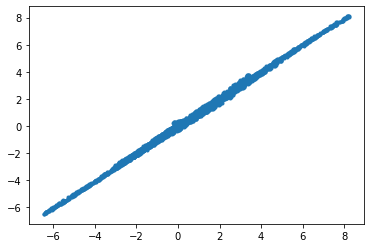

In [16]:
#Mejor modelo y diagnóstico:
modelo = load_model('best_model.h5')
z_predict = model.predict(Z_train)
plt.plot(z_predict,z_train,'.')
print('MSE:', mean_squared_error(z_train, z_predict))
print('MAE:', mean_absolute_error(z_train, z_predict))
print('RMSE:', mean_squared_error(z_train, z_predict)**0.5)
print('Spearman R:', spearmanr(z_train, z_predict))
print('R2:', r2_score(z_train, z_predict))

6. Respecto a la pregunta anterior, concluir sobre los resultados obtenidos discutiendo sobre el sobreajuste y la capacidad de aprendizaje.

<font color='#086F0C'>Al permitir que el modelo itere por 1000 épocas, sin parada temprana, se alcanzan, sobre el mismo conjunto de datos de entrenamiento, métricas de error cercanas a 0 (en particular, la raíz del error cuadrático medio, $RMSE$, es cercana a 0.099). Con ello, los indicadores de correlación de Spearman y $R^2$, para estudiar la relación entre el valor real de la función ($z$) y la predicción, exhiben valores cercanos a 1. Esto señala que el modelo sin restricciones que apunten a detener su ejecución, puede llegar a sobreaprender el conjunto de datos sobre el cual se está entrenando, poniendo en riesgo su capacidad de predecir sobre un conjunto de datos foráneo, por ejemplo al evaluar sobre un set de datos de prueba.

Por último, es importante señalar que en este experimento se utilizó una red con dos capas ocultas, de 100 y 20 neuronas respectivamente, luego de la capa de entrada.</font>

---

94/94 [==============================] - 0s 2ms/step
MSE: 0.009968469942920829
MAE: 0.07569904842383189
RMSE: 0.09984222525024584
Spearman R: SpearmanrResult(correlation=0.9754114149318694, pvalue=0.0)
R2: 0.9972044897253107


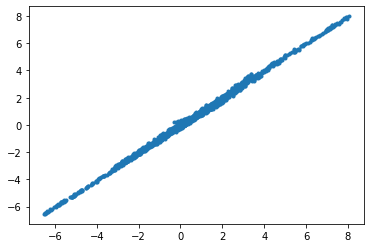

In [17]:
z_predict_test = model.predict(Z_test)
plt.plot(z_predict_test,z_test,'.')
print('MSE:', mean_squared_error(z_test, z_predict_test))
print('MAE:', mean_absolute_error(z_test, z_predict_test))
print('RMSE:', mean_squared_error(z_test, z_predict_test)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test))
print('R2:', r2_score(z_test, z_predict_test))

<font color='#086F0C'>Cuando se realiza el mismo ejercicio sobre el conjunto de datos de prueba, se verifica nuevamente un desempeño similar ($RMSE \sim 0.099)$, con elevados correlación de Spearman y coeficiente $R^2$. En este sentido, si bien se concluye que la predicción tiene alto nivel de precisión, se ha forzado a que el modelo sobreaprenda el comportamiento de la función a modelar.</font>

---

7. Respecto a la pregunta 5, concluir sobre el **teorema de aproximación universal**.

<font color='#086F0C'>De acuerdo con Goodfellow et al. (2016), el Teorema de Aproximación Universal establece que una red feedforward con una capa lineal de salida y al menos una capa oculta, como la arquitectura de este ejercicio, puede representar funciones Borel medibles (como la función de este experimento, que es continua y acotada en el conjunto $[-3,3]x[-3,3]$) con cualquier nivel de error dado (con una cantidad de neuronas en las capas ocultas apropiada).

En este caso, el alto nivel de ajuste logrado sustenta de manera empírica el Teorema, en particular notando que la función es no lineal. </font>

---

7. **Parada Temprana y búsqueda de un modelo adecuado:** Diseñar e Implentar una red neuronal MLP con el fin de que pueda aprender la variable $V$, teniendo como entrada las variables $X$ e $Y$. El modelo deberá tener una arquitectura parsimoniosa.

Calcular la raíz del error cuadrático medio del modelo con respecto a $V$, tanto para el conjunto de entrenamiento como el de test. Ajustar el modelo incorporando un conjunto de validación con el fin de hacer una parada temprana en caso que el error empiece a aumentar. 

In [18]:
#Ajuste del modelo con parada temprana (paciencia = 5):
es2 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc2 = ModelCheckpoint('best_model2.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [19]:
model.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es2,mc2])

Epoch 1/1000
241/245 [============================>.] - ETA: 0s - loss: 0.0093 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0093
Epoch 1: val_loss improved from inf to 0.00947, saving model to best_model2.h5
245/245 [==============================] - 1s 4ms/step - loss: 0.0094 - mean_absolute_error: 0.0716 - mean_squared_error: 0.0094 - val_loss: 0.0095 - val_mean_absolute_error: 0.0725 - val_mean_squared_error: 0.0095
Epoch 2/1000
232/245 [===========================>..] - ETA: 0s - loss: 0.0097 - mean_absolute_error: 0.0729 - mean_squared_error: 0.0097
Epoch 2: val_loss improved from 0.00947 to 0.00860, saving model to best_model2.h5
245/245 [==============================] - 1s 4ms/step - loss: 0.0097 - mean_absolute_error: 0.0729 - mean_squared_error: 0.0097 - val_loss: 0.0086 - val_mean_absolute_error: 0.0675 - val_mean_squared_error: 0.0086
Epoch 3/1000
229/245 [===========================>..] - ETA: 0s - loss: 0.0095 - mean_absolute_error: 0.0721 - mean_squared_error: 0

219/219 [==============================] - 0s 1ms/step
MSE: 0.00951951744129858
MAE: 0.07185651815365489
RMSE: 0.09756801443761465
Spearman R: SpearmanrResult(correlation=0.9790845681298228, pvalue=0.0)
R2: 0.9974351202374458


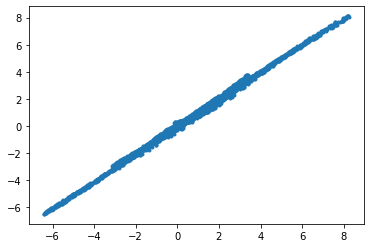

In [20]:
#Mejor modelo y diagnóstico:
modelo = load_model('best_model2.h5')
z_predict = model.predict(Z_train)
plt.plot(z_predict,z_train,'.')
print('MSE:', mean_squared_error(z_train, z_predict))
print('MAE:', mean_absolute_error(z_train, z_predict))
print('RMSE:', mean_squared_error(z_train, z_predict)**0.5)
print('Spearman R:', spearmanr(z_train, z_predict))
print('R2:', r2_score(z_train, z_predict))

94/94 [==============================] - 0s 1ms/step
MSE: 0.009831995009089295
MAE: 0.07244308127947344
RMSE: 0.09915641688307063
Spearman R: SpearmanrResult(correlation=0.9774682931606401, pvalue=0.0)
R2: 0.9972427621063229


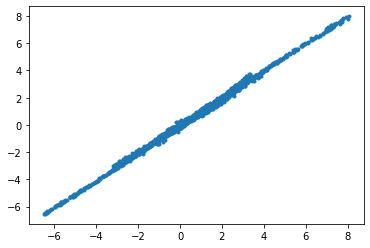

In [21]:
z_predict_test2 = model.predict(Z_test)
plt.plot(z_predict_test2,z_test,'.')
print('MSE:', mean_squared_error(z_test, z_predict_test2))
print('MAE:', mean_absolute_error(z_test, z_predict_test2))
print('RMSE:', mean_squared_error(z_test, z_predict_test2)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test2))
print('R2:', r2_score(z_test, z_predict_test2))

8. Respecto a la pregunta anterior, concluir sobre los resultados obtenidos discutiendo sobre la capacidad de generalización.

<font color='#086F0C'>Al implementar un mecanismo de parada temprana (paciencia = 10) sobre la misma arquitectura de red, en este caso, se ha obtenido una solución muy similar a la anterior, en término de sus medidas de error, pero en un tiempo de ejecución considerablemente inferior. En este sentido, la utilización de una restricción para las ejecuciones, en pos de una solución más práctica, muestra que el resultado logrado puede ser igualmente satisfactorio.

No obstante, Goodfellow et al. (2016) levanta la alerta de que no existe un procedimiento universal que asegure que los resultados serán generalizables a un conjunto de datos distintos al de entrenamiento. En este experimento, el buen desempeño en general puede deberse a la cantidad de neuronas empleadas en las capas ocultas (2 capas ocultas), lo que repercute en el elevado número de parámetros que considera el modelo implementado (cerca de 2300 parámetros en total). </font>

---

9 **Deep vs Wide en MLP**

- Shallow MLP: Diseñar e implementar un MLP con una única capa escondida, variando el número de neuronas en 5, 10, 50, 100, 1000.

- Deep MLP: Diseñar e implementar un MLP con una única capa escondida, variando el número de capas en 2, 3, 5 y 10, cada capa con 5 neuronas escondidas.

Evaluar los desempeños con el conjunto de Test y Concluir


In [22]:
#1 capa escondida, 5 neuronas:

model2 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model2.add(Dense(5, input_dim=2, activation='sigmoid'))
model2.add(Dense(1, activation='linear'))

model2.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 15        
                                                                 
 dense_4 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


In [23]:
#Ajuste:
es3 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc3 = ModelCheckpoint('best_model3.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)


In [24]:
model2.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es3,mc3])

Epoch 1/1000
216/245 [=========================>....] - ETA: 0s - loss: 3.5420 - mean_absolute_error: 1.1954 - mean_squared_error: 3.5420
Epoch 1: val_loss improved from inf to 3.45674, saving model to best_model3.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.5922 - mean_absolute_error: 1.2047 - mean_squared_error: 3.5922 - val_loss: 3.4567 - val_mean_absolute_error: 1.2139 - val_mean_squared_error: 3.4567
Epoch 2/1000
227/245 [==========================>...] - ETA: 0s - loss: 3.5685 - mean_absolute_error: 1.2201 - mean_squared_error: 3.5685
Epoch 2: val_loss improved from 3.45674 to 3.40192, saving model to best_model3.h5
245/245 [==============================] - 1s 2ms/step - loss: 3.5420 - mean_absolute_error: 1.2155 - mean_squared_error: 3.5420 - val_loss: 3.4019 - val_mean_absolute_error: 1.1849 - val_mean_squared_error: 3.4019
Epoch 3/1000
221/245 [==========================>...] - ETA: 0s - loss: 3.5185 - mean_absolute_error: 1.1938 - mean_squared_error: 3

94/94 [==============================] - 0s 2ms/step
MSE: 1.5485735174071744
MAE: 0.9019947805728415
RMSE: 1.2444169387336281
Spearman R: SpearmanrResult(correlation=0.81259391206599, pvalue=0.0)
R2: 0.5657254118423933


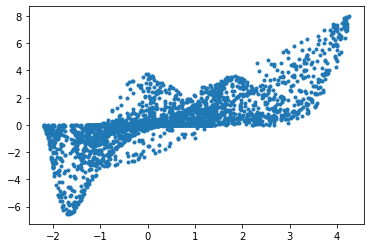

In [25]:
modelo = load_model('best_model3.h5')

z_predict_test3 = model2.predict(Z_test)

plt.plot(z_predict_test3,z_test,'.')

print('MSE:', mean_squared_error(z_test, z_predict_test3))
print('MAE:', mean_absolute_error(z_test, z_predict_test3))
print('RMSE:', mean_squared_error(z_test, z_predict_test3)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test3))
print('R2:', r2_score(z_test, z_predict_test3))

In [26]:
#1 capa escondida, 10 neuronas:

model4 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model4.add(Dense(10, input_dim=2, activation='sigmoid'))
model4.add(Dense(1, activation='linear'))

model4.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model4.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                30        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [27]:
#Ajuste:
es4 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc4 = ModelCheckpoint('best_model4.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [28]:
model4.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es4,mc4])

Epoch 1/1000
228/245 [==========================>...] - ETA: 0s - loss: 3.6486 - mean_absolute_error: 1.2589 - mean_squared_error: 3.6486
Epoch 1: val_loss improved from inf to 3.51496, saving model to best_model4.h5
245/245 [==============================] - 2s 4ms/step - loss: 3.6627 - mean_absolute_error: 1.2594 - mean_squared_error: 3.6627 - val_loss: 3.5150 - val_mean_absolute_error: 1.2168 - val_mean_squared_error: 3.5150
Epoch 2/1000
237/245 [============================>.] - ETA: 0s - loss: 3.6221 - mean_absolute_error: 1.2276 - mean_squared_error: 3.6221
Epoch 2: val_loss improved from 3.51496 to 3.46728, saving model to best_model4.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.6066 - mean_absolute_error: 1.2241 - mean_squared_error: 3.6066 - val_loss: 3.4673 - val_mean_absolute_error: 1.2110 - val_mean_squared_error: 3.4673
Epoch 3/1000
224/245 [==========================>...] - ETA: 0s - loss: 3.5665 - mean_absolute_error: 1.2205 - mean_squared_error: 3

94/94 [==============================] - 0s 1ms/step
MSE: 0.9939577929832596
MAE: 0.7181265381211597
RMSE: 0.9969743191192337
Spearman R: SpearmanrResult(correlation=0.8647837049759671, pvalue=0.0)
R2: 0.7212592063975272


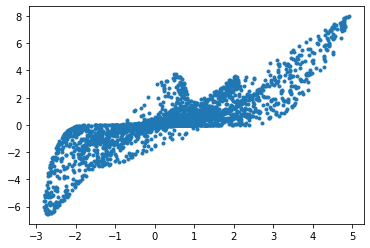

In [29]:
modelo = load_model('best_model4.h5')

z_predict_test4 = model4.predict(Z_test)

plt.plot(z_predict_test4,z_test,'.')

print('MSE:', mean_squared_error(z_test, z_predict_test4))
print('MAE:', mean_absolute_error(z_test, z_predict_test4))
print('RMSE:', mean_squared_error(z_test, z_predict_test4)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test4))
print('R2:', r2_score(z_test, z_predict_test4))

In [30]:
#1 capa escondida, 50 neuronas:

model5 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model5.add(Dense(50, input_dim=2, activation='sigmoid'))
model5.add(Dense(1, activation='linear'))

model5.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model5.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                150       
                                                                 
 dense_8 (Dense)             (None, 1)                 51        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [31]:
#Ajuste:
es5 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc5 = ModelCheckpoint('best_model5.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [32]:
model5.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es5,mc5])

Epoch 1/1000
241/245 [============================>.] - ETA: 0s - loss: 3.6878 - mean_absolute_error: 1.2568 - mean_squared_error: 3.6878
Epoch 1: val_loss improved from inf to 3.49359, saving model to best_model5.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.6983 - mean_absolute_error: 1.2564 - mean_squared_error: 3.6983 - val_loss: 3.4936 - val_mean_absolute_error: 1.1771 - val_mean_squared_error: 3.4936
Epoch 2/1000
245/245 [==============================] - ETA: 0s - loss: 3.5521 - mean_absolute_error: 1.2088 - mean_squared_error: 3.5521
Epoch 2: val_loss improved from 3.49359 to 3.38333, saving model to best_model5.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.5521 - mean_absolute_error: 1.2088 - mean_squared_error: 3.5521 - val_loss: 3.3833 - val_mean_absolute_error: 1.2011 - val_mean_squared_error: 3.3833
Epoch 3/1000
227/245 [==========================>...] - ETA: 0s - loss: 3.4718 - mean_absolute_error: 1.1960 - mean_squared_error: 3

94/94 [==============================] - 0s 1ms/step
MSE: 0.9283389198247768
MAE: 0.6750339419843607
RMSE: 0.9635034612417211
Spearman R: SpearmanrResult(correlation=0.8589514923279434, pvalue=0.0)
R2: 0.7396610509311848


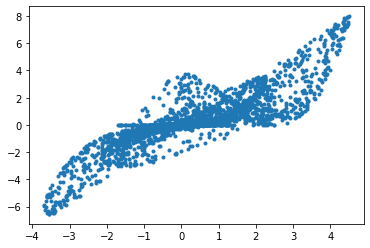

In [33]:
modelo = load_model('best_model5.h5')

z_predict_test5 = model5.predict(Z_test)

plt.plot(z_predict_test5,z_test,'.')

print('MSE:', mean_squared_error(z_test, z_predict_test5))
print('MAE:', mean_absolute_error(z_test, z_predict_test5))
print('RMSE:', mean_squared_error(z_test, z_predict_test5)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test5))
print('R2:', r2_score(z_test, z_predict_test5))

In [38]:
#1 capa escondida, 100 neuronas:

model6 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model6.add(Dense(100, input_dim=2, activation='sigmoid'))
model6.add(Dense(1, activation='linear'))

model6.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model6.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 100)               300       
                                                                 
 dense_12 (Dense)            (None, 1)                 101       
                                                                 
Total params: 401
Trainable params: 401
Non-trainable params: 0
_________________________________________________________________


In [39]:
#Ajuste:
es6 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc6 = ModelCheckpoint('best_model6.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [40]:
model6.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es6,mc6])

Epoch 1/1000
220/245 [=========================>....] - ETA: 0s - loss: 3.7612 - mean_absolute_error: 1.2601 - mean_squared_error: 3.7612
Epoch 1: val_loss improved from inf to 3.42833, saving model to best_model6.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.6723 - mean_absolute_error: 1.2417 - mean_squared_error: 3.6723 - val_loss: 3.4283 - val_mean_absolute_error: 1.1591 - val_mean_squared_error: 3.4283
Epoch 2/1000
227/245 [==========================>...] - ETA: 0s - loss: 3.4552 - mean_absolute_error: 1.1893 - mean_squared_error: 3.4552
Epoch 2: val_loss improved from 3.42833 to 3.27471, saving model to best_model6.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.4683 - mean_absolute_error: 1.1894 - mean_squared_error: 3.4683 - val_loss: 3.2747 - val_mean_absolute_error: 1.1768 - val_mean_squared_error: 3.2747
Epoch 3/1000
229/245 [===========================>..] - ETA: 0s - loss: 3.3146 - mean_absolute_error: 1.1789 - mean_squared_error: 3

94/94 [==============================] - 0s 1ms/step
MSE: 3.0289539951904043
MAE: 1.231689433157667
RMSE: 1.7403890355867002
Spearman R: SpearmanrResult(correlation=0.5304863496095943, pvalue=1.9883500288311236e-217)
R2: 0.15057455521255325


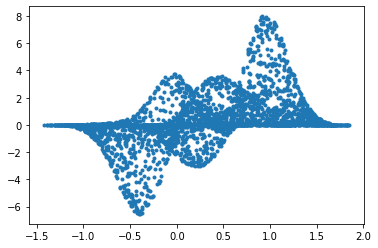

In [41]:
modelo = load_model('best_model6.h5')

z_predict_test6 = model6.predict(Z_test)

plt.plot(z_predict_test6,z_test,'.')

print('MSE:', mean_squared_error(z_test, z_predict_test6))
print('MAE:', mean_absolute_error(z_test, z_predict_test6))
print('RMSE:', mean_squared_error(z_test, z_predict_test6)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test6))
print('R2:', r2_score(z_test, z_predict_test6))

In [42]:
#1 capa escondida, 1000 neuronas:

model7 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model7.add(Dense(1000, input_dim=2, activation='sigmoid'))
model7.add(Dense(1, activation='linear'))

model7.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model7.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 1000)              3000      
                                                                 
 dense_14 (Dense)            (None, 1)                 1001      
                                                                 
Total params: 4,001
Trainable params: 4,001
Non-trainable params: 0
_________________________________________________________________


In [43]:
#Ajuste:
es7 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc7 = ModelCheckpoint('best_model7.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [44]:
model7.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es7,mc7])

Epoch 1/1000
223/245 [==========================>...] - ETA: 0s - loss: 3.6718 - mean_absolute_error: 1.2505 - mean_squared_error: 3.6718
Epoch 1: val_loss improved from inf to 3.40712, saving model to best_model7.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.6444 - mean_absolute_error: 1.2482 - mean_squared_error: 3.6444 - val_loss: 3.4071 - val_mean_absolute_error: 1.3007 - val_mean_squared_error: 3.4071
Epoch 2/1000
237/245 [============================>.] - ETA: 0s - loss: 3.3297 - mean_absolute_error: 1.2230 - mean_squared_error: 3.3297
Epoch 2: val_loss improved from 3.40712 to 3.09329, saving model to best_model7.h5
245/245 [==============================] - 1s 4ms/step - loss: 3.3264 - mean_absolute_error: 1.2239 - mean_squared_error: 3.3264 - val_loss: 3.0933 - val_mean_absolute_error: 1.1834 - val_mean_squared_error: 3.0933
Epoch 3/1000
219/245 [=========================>....] - ETA: 0s - loss: 3.2368 - mean_absolute_error: 1.2542 - mean_squared_error: 3

94/94 [==============================] - 0s 1ms/step
MSE: 3.0343892117795757
MAE: 1.2275662277734607
RMSE: 1.7419498304427643
Spearman R: SpearmanrResult(correlation=0.5317902097544677, pvalue=1.1000477610261494e-218)
R2: 0.14905032893638537


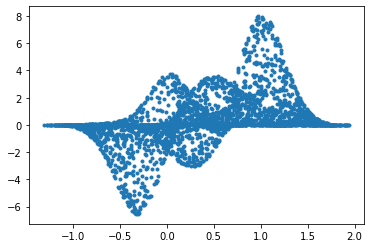

In [45]:
modelo = load_model('best_model7.h5')

z_predict_test7 = model7.predict(Z_test)

plt.plot(z_predict_test7,z_test,'.')

print('MSE:', mean_squared_error(z_test, z_predict_test7))
print('MAE:', mean_absolute_error(z_test, z_predict_test7))
print('RMSE:', mean_squared_error(z_test, z_predict_test7)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test7))
print('R2:', r2_score(z_test, z_predict_test7))

In [46]:
#2 capas escondidas, 5 neuronas:

model8 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model8.add(Dense(5, input_dim=2, activation='sigmoid'))
model8.add(Dense(5, activation='sigmoid'))
model8.add(Dense(1, activation='linear'))

model8.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model8.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [47]:
#Ajuste:
es8 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc8 = ModelCheckpoint('best_model8.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [48]:
model8.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es8,mc8])

Epoch 1/1000
240/245 [============================>.] - ETA: 0s - loss: 3.8695 - mean_absolute_error: 1.2033 - mean_squared_error: 3.8695
Epoch 1: val_loss improved from inf to 3.62401, saving model to best_model8.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.8697 - mean_absolute_error: 1.2044 - mean_squared_error: 3.8697 - val_loss: 3.6240 - val_mean_absolute_error: 1.2019 - val_mean_squared_error: 3.6240
Epoch 2/1000
215/245 [=========================>....] - ETA: 0s - loss: 3.7261 - mean_absolute_error: 1.2337 - mean_squared_error: 3.7261
Epoch 2: val_loss improved from 3.62401 to 3.61613, saving model to best_model8.h5
245/245 [==============================] - 1s 2ms/step - loss: 3.7437 - mean_absolute_error: 1.2351 - mean_squared_error: 3.7437 - val_loss: 3.6161 - val_mean_absolute_error: 1.2275 - val_mean_squared_error: 3.6161
Epoch 3/1000
224/245 [==========================>...] - ETA: 0s - loss: 3.7240 - mean_absolute_error: 1.2455 - mean_squared_error: 3

94/94 [==============================] - 0s 2ms/step
MSE: 0.2862738072274866
MAE: 0.3922871438123451
RMSE: 0.5350456122869214
Spearman R: SpearmanrResult(correlation=0.9025548056172005, pvalue=0.0)
R2: 0.9197187357677522


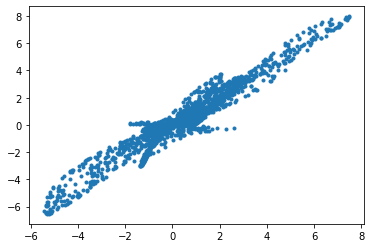

In [49]:
modelo = load_model('best_model8.h5')

z_predict_test8 = model8.predict(Z_test)

plt.plot(z_predict_test8,z_test,'.')

print('MSE:', mean_squared_error(z_test, z_predict_test8))
print('MAE:', mean_absolute_error(z_test, z_predict_test8))
print('RMSE:', mean_squared_error(z_test, z_predict_test8)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test8))
print('R2:', r2_score(z_test, z_predict_test8))

In [50]:
#3 capas escondidas, 5 neuronas:

model9 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model9.add(Dense(5, input_dim=2, activation='sigmoid'))
model9.add(Dense(5, activation='sigmoid'))
model9.add(Dense(5, activation='sigmoid'))
model9.add(Dense(1, activation='linear'))

model9.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 5)                 15        
                                                                 
 dense_19 (Dense)            (None, 5)                 30        
                                                                 
 dense_20 (Dense)            (None, 5)                 30        
                                                                 
 dense_21 (Dense)            (None, 1)                 6         
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________


In [51]:
#Ajuste:
es9 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc9 = ModelCheckpoint('best_model9.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [52]:
model9.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es9,mc9])

Epoch 1/1000
228/245 [==========================>...] - ETA: 0s - loss: 4.0946 - mean_absolute_error: 1.2812 - mean_squared_error: 4.0946
Epoch 1: val_loss improved from inf to 3.63032, saving model to best_model9.h5
245/245 [==============================] - 2s 3ms/step - loss: 4.0959 - mean_absolute_error: 1.2780 - mean_squared_error: 4.0959 - val_loss: 3.6303 - val_mean_absolute_error: 1.1900 - val_mean_squared_error: 3.6303
Epoch 2/1000
233/245 [===========================>..] - ETA: 0s - loss: 3.7161 - mean_absolute_error: 1.2236 - mean_squared_error: 3.7161
Epoch 2: val_loss improved from 3.63032 to 3.62205, saving model to best_model9.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.7443 - mean_absolute_error: 1.2317 - mean_squared_error: 3.7443 - val_loss: 3.6220 - val_mean_absolute_error: 1.2386 - val_mean_squared_error: 3.6220
Epoch 3/1000
234/245 [===========================>..] - ETA: 0s - loss: 3.7231 - mean_absolute_error: 1.2421 - mean_squared_error: 3

94/94 [==============================] - 0s 1ms/step
MSE: 0.5617015866023277
MAE: 0.40825337557302555
RMSE: 0.7494675353891773
Spearman R: SpearmanrResult(correlation=0.926588106954234, pvalue=0.0)
R2: 0.8424790799744372


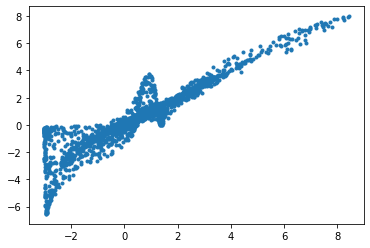

In [53]:
modelo = load_model('best_model9.h5')

z_predict_test9 = model9.predict(Z_test)

plt.plot(z_predict_test9,z_test,'.')

print('MSE:', mean_squared_error(z_test, z_predict_test9))
print('MAE:', mean_absolute_error(z_test, z_predict_test9))
print('RMSE:', mean_squared_error(z_test, z_predict_test9)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test9))
print('R2:', r2_score(z_test, z_predict_test9))

In [54]:
#5 capas escondidas, 5 neuronas:

model10 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model10.add(Dense(5, input_dim=2, activation='sigmoid'))
model10.add(Dense(5, activation='sigmoid'))
model10.add(Dense(5, activation='sigmoid'))
model10.add(Dense(5, activation='sigmoid'))
model10.add(Dense(5, activation='sigmoid'))
model10.add(Dense(1, activation='linear'))

model10.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model10.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 5)                 15        
                                                                 
 dense_23 (Dense)            (None, 5)                 30        
                                                                 
 dense_24 (Dense)            (None, 5)                 30        
                                                                 
 dense_25 (Dense)            (None, 5)                 30        
                                                                 
 dense_26 (Dense)            (None, 5)                 30        
                                                                 
 dense_27 (Dense)            (None, 1)                 6         
                                                                 
Total params: 141
Trainable params: 141
Non-trainable 

In [55]:
#Ajuste:
es10 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc10 = ModelCheckpoint('best_model10.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [57]:
model10.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es10,mc10])

Epoch 1/1000
238/245 [============================>.] - ETA: 0s - loss: 2.5251 - mean_absolute_error: 1.1512 - mean_squared_error: 2.5251
Epoch 1: val_loss improved from 2.50525 to 2.50320, saving model to best_model10.h5
245/245 [==============================] - 1s 3ms/step - loss: 2.5332 - mean_absolute_error: 1.1496 - mean_squared_error: 2.5332 - val_loss: 2.5032 - val_mean_absolute_error: 1.1423 - val_mean_squared_error: 2.5032
Epoch 2/1000
233/245 [===========================>..] - ETA: 0s - loss: 2.5379 - mean_absolute_error: 1.1526 - mean_squared_error: 2.5379
Epoch 2: val_loss did not improve from 2.50320
245/245 [==============================] - 1s 3ms/step - loss: 2.5313 - mean_absolute_error: 1.1519 - mean_squared_error: 2.5313 - val_loss: 2.5033 - val_mean_absolute_error: 1.1418 - val_mean_squared_error: 2.5033
Epoch 3/1000
242/245 [============================>.] - ETA: 0s - loss: 2.5304 - mean_absolute_error: 1.1500 - mean_squared_error: 2.5304
Epoch 3: val_loss did not

94/94 [==============================] - 0s 1ms/step
MSE: 0.04129079637926566
MAE: 0.14856958052464816
RMSE: 0.20320136903885677
Spearman R: SpearmanrResult(correlation=0.9669060576562285, pvalue=0.0)
R2: 0.9884206055503723


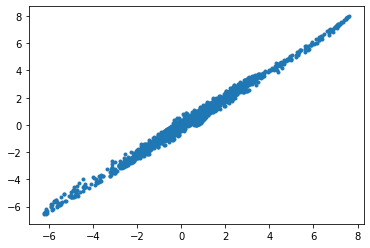

In [58]:
modelo = load_model('best_model10.h5')

z_predict_test10 = model10.predict(Z_test)

plt.plot(z_predict_test10,z_test,'.')

print('MSE:', mean_squared_error(z_test, z_predict_test10))
print('MAE:', mean_absolute_error(z_test, z_predict_test10))
print('RMSE:', mean_squared_error(z_test, z_predict_test10)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test10))
print('R2:', r2_score(z_test, z_predict_test10))

In [59]:
#10 capas escondidas, 5 neuronas:

model11 = Sequential()
#model.add(Dense(100, input_dim=2, activation='sigmoid'))
model11.add(Dense(5, input_dim=2, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(5, activation='sigmoid'))
model11.add(Dense(1, activation='linear'))

model11.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
model11.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 5)                 15        
                                                                 
 dense_29 (Dense)            (None, 5)                 30        
                                                                 
 dense_30 (Dense)            (None, 5)                 30        
                                                                 
 dense_31 (Dense)            (None, 5)                 30        
                                                                 
 dense_32 (Dense)            (None, 5)                 30        
                                                                 
 dense_33 (Dense)            (None, 5)                 30        
                                                                 
 dense_34 (Dense)            (None, 5)               

In [60]:
#Ajuste:
es11 = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)
mc11 = ModelCheckpoint('best_model11.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)

In [63]:
model11.fit(Z_train, z_train, epochs=1000, batch_size=20, validation_split=0.3, shuffle=True, verbose=True, callbacks=[es11,mc11])

Epoch 1/1000
235/245 [===========================>..] - ETA: 0s - loss: 3.7709 - mean_absolute_error: 1.2562 - mean_squared_error: 3.7709
Epoch 1: val_loss did not improve from 3.62919
245/245 [==============================] - 1s 3ms/step - loss: 3.7480 - mean_absolute_error: 1.2501 - mean_squared_error: 3.7480 - val_loss: 3.6357 - val_mean_absolute_error: 1.2511 - val_mean_squared_error: 3.6357
Epoch 2/1000
227/245 [==========================>...] - ETA: 0s - loss: 3.7733 - mean_absolute_error: 1.2615 - mean_squared_error: 3.7733
Epoch 2: val_loss improved from 3.62919 to 3.62780, saving model to best_model11.h5
245/245 [==============================] - 1s 3ms/step - loss: 3.7478 - mean_absolute_error: 1.2560 - mean_squared_error: 3.7478 - val_loss: 3.6278 - val_mean_absolute_error: 1.2310 - val_mean_squared_error: 3.6278
Epoch 3/1000
245/245 [==============================] - ETA: 0s - loss: 3.7483 - mean_absolute_error: 1.2512 - mean_squared_error: 3.7483
Epoch 3: val_loss did not

94/94 [==============================] - 0s 1ms/step
MSE: 2.476598285923006
MAE: 1.1388485949025353
RMSE: 1.5737211588852091
Spearman R: SpearmanrResult(correlation=0.6025964215658073, pvalue=4.6032560446269607e-296)
R2: 0.30547456187173394


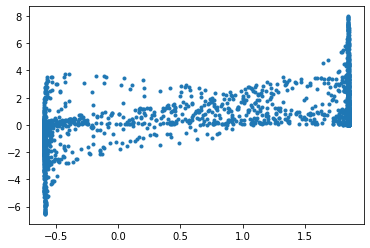

In [64]:
modelo = load_model('best_model11.h5')

z_predict_test11 = model11.predict(Z_test)

plt.plot(z_predict_test11,z_test,'.')

print('MSE:', mean_squared_error(z_test, z_predict_test11))
print('MAE:', mean_absolute_error(z_test, z_predict_test11))
print('RMSE:', mean_squared_error(z_test, z_predict_test11)**0.5)
print('Spearman R:', spearmanr(z_test, z_predict_test11))
print('R2:', r2_score(z_test, z_predict_test11))



10. Conclusiones Finales

In [66]:
# Tabla comparativa
from tabulate import tabulate
data = [[1,5,21,1000,1.55,0.90,1.24,0.81,0.57],
[1,10,41,1000,0.99,0.72,1.00,0.86,0.72],
[1,50,201,1000,0.93,0.68,0.96,0.86,0.74],
[1,100,401,19,3.03,1.23,1.74,0.53,0.15],
[1,1000,4001,22,3.03,1.23,1.74,0.53,0.15],
[2,5,51,1000,0.29,0.39,0.54,0.90,0.92],
[3,5,81,1000,0.56,0.41,0.75,0.93,0.84],
[5,5,141,876,0.041,0.15,0.20,0.97,0.99],
[10,5,291,248,2.48,1.39,1.57,0.60,0.31]
]
print (tabulate(data, headers=["Capas ocultas", "Neuronas por capa oculta", "Parámetros", "Épocas", "MSE", "MAE", "RMSE", "Spearman","R2"]))

  Capas ocultas    Neuronas por capa oculta    Parámetros    Épocas    MSE    MAE    RMSE    Spearman    R2
---------------  --------------------------  ------------  --------  -----  -----  ------  ----------  ----
              1                           5            21      1000  1.55    0.9     1.24        0.81  0.57
              1                          10            41      1000  0.99    0.72    1           0.86  0.72
              1                          50           201      1000  0.93    0.68    0.96        0.86  0.74
              1                         100           401        19  3.03    1.23    1.74        0.53  0.15
              1                        1000          4001        22  3.03    1.23    1.74        0.53  0.15
              2                           5            51      1000  0.29    0.39    0.54        0.9   0.92
              3                           5            81      1000  0.56    0.41    0.75        0.93  0.84
              5             

<font color='#086F0C'>Sobre el mismo conjunto de datos de prueba, la tabla resume los resultados, medidos en indicadores de error (MSE, MAE y RMSE) y otros de ajuste (Correlación de Spearman y $R^2$) al comparar la predicción efectuada por la red neuronal entrenada, con arquitectura variable, versus el valor real de la función. Notar que además se han incorporado la cantidad de parámetros involucrada en cada diseño y las épocas utilizadas en iterar, aunque todas las configuraciones se probaron con un mecanismo de parada temprana (paciencia = 10) y 1000 épocas disponibles.</font>

<font color='#086F0C'>Como se puede apreciar, para un número fijo de capas ocultas (1), el aumentar las neuronas en la capa mejora los índices de error y ajuste, sin embargo, no sucede de manera indefinida: al alcanzar 100 y 1000 neuronas se activa el criterio de parada temprana y los índices resultan virtualmente iguales entre sí (varían en decimales a partir de la tercera posición en algunos casos). Es decir, aumentar el número de neuronas en la única capa oculta, no necesariamente garantiza un mejor modelo, en particular si se busca una solución práctica.</font>

<font color='#086F0C'>Situación similar ocurre con el número de capas, en donde el mejor desempeño se observa al alcanzar 5 capas ocultas con 5 neuronas cada una, iterando en 876 épocas de un total de 1000. Notar que con 10 capas los resultados vuelven a empeorar.


Estos resultados refuerzan la idea de que no existe un mecanismo que garantice la configuración del "mejor modelo", así como también levantan una alerta de que, al construir una red con una arquitectura más compleja (más capas o más neuronas), lo que repercute en un mayor número de parámetros a estimar, no es sinónimo de lograr un mejor modelo siempre, si el objetivo es implementar una solución práctica.</font>

---

11. Referencias


*   Goodfellow, I., Bengio, Y. y Courville, A. (2016). *Deep Learning*. MIT Press. http://www.deeplearningbook.org

